# Market segmentation example

## Import the relevant libraries

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Import the KMeans module so we can perform k-means clustering with sklearn
from sklearn.cluster import KMeans

## Load the data

In [27]:
# Load the data
df = pd.read_csv (r'https://raw.githubusercontent.com/MarcoCalbucci/DataAnalytics/main/PredictiveModeling/Clustering/Exercises/MarketSegmentation/market_segmentation.csv')

In [28]:
df.head()

,Satisfaction,Loyalty
0,4,-1.33
1,6,-0.28
2,5,-0.99
3,7,-0.29
4,4,1.06


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Satisfaction  30 non-null     int64  
 1   Loyalty       30 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 608.0 bytes


## Plot the data

Create a preliminary plot to see if you can spot something

Text(0, 0.5, 'Loyalty')

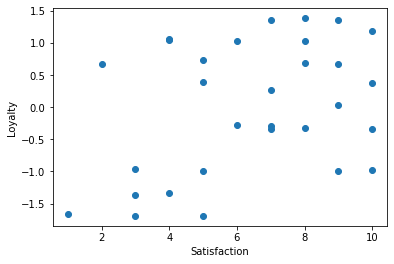

In [30]:
# We are creating a scatter plot of the two variables
plt.scatter(df['Satisfaction'], df['Loyalty'])
# Name your axes 
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')

## Select the features

## Clustering

In [31]:
# Create a KMeans object
# The number in the brackets is K, or the number of clusters we are aiming for
kmeans = KMeans(2)
# Fit the data
kmeans.fit(df[['Satisfaction', 'Loyalty']])

KMeans(n_clusters=2)

## Clustering results

In [32]:
# Take note of the predicted clusters 
df['cluster_pred'] = kmeans.fit_predict(df)

In [33]:
df.head()

,Satisfaction,Loyalty,cluster_pred
0,4,-1.33,0
1,6,-0.28,0
2,5,-0.99,0
3,7,-0.29,1
4,4,1.06,0


Text(0, 0.5, 'Loyalty')

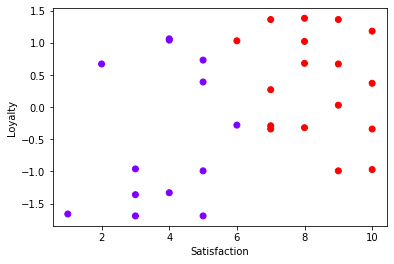

In [40]:
# Plot the data using the longitude and the latitude
# c (color) is an argument which could be coded with a variable 
# The variable in this case has values 0,1, indicating to plt.scatter, that there are two colors (0,1)
# All points in cluster 0 will be the same colour, all points in cluster 1 - another one, etc.

plt.scatter(df['Satisfaction'],df['Loyalty'],c=df['cluster_pred'], cmap='rainbow')
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')

## Standardize the variables

Let's standardize and check the new result

In [ ]:
# Import a library which can do that easily
from sklearn import preprocessing
# Scale the inputs
# preprocessing.scale scales each variable (column in x) with respect to itself
# The new result is an array
df[['Satisfaction', 'Loyalty']] = preprocessing.scale(df[['Satisfaction', 'Loyalty']])
df[['Satisfaction', 'Loyalty']]

## Take advantage of the Elbow method

In [47]:
# Createa an empty list
# WCSS (within-cluster sum of square)
wcss =[]

# Create all possible cluster solutions with a loop
for i in range(1,10):
    # Clsuter solution with i clusters
    kmeans = KMeans(i)
    # Fit the STANDARDIZED data
    kmeans.fit(df[['Satisfaction', 'Loyalty']])
    # Append the WCSS for the iteration
    wcss.append(kmeans.inertia_)
    
# Check the result
wcss

[60.000000000000014,
 29.81897303472315,
 17.91334952738797,
 10.247181805928424,
 7.7926951539371885,
 6.569489487091785,
 5.348079410290982,
 4.337110750237061,
 3.8446731392616504]

Text(0, 0.5, 'WCSS')

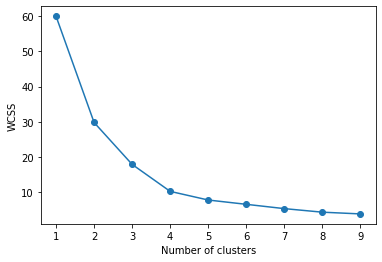

In [48]:
# Plot the number of clusters vs WCSS
plt.plot(range(1,10), wcss, '-o')
# Name your axes
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

## Explore clustering solutions and select the number of clusters

In [50]:
# Fiddle with K (the number of clusters)
kmeans_new = KMeans(4)
# Fit the data
kmeans_new.fit(df[['Satisfaction', 'Loyalty']])
df['cluster_pred'] = kmeans_new.fit_predict(df)

In [51]:
# Check if everything seems right
df.head()

,Satisfaction,Loyalty,cluster_pred
0,-0.931381,-1.331811,0
1,-0.155230,-0.281171,2
2,-0.543305,-0.991604,0
3,0.232845,-0.291177,3
4,-0.931381,1.059645,2


Text(0, 0.5, 'Loyalty')

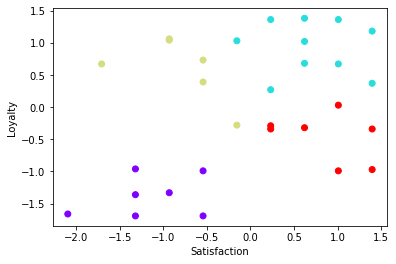

In [52]:
# Plot
plt.scatter(df['Satisfaction'],df['Loyalty'],c=df['cluster_pred'],cmap='rainbow')
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')